### PREVISÃO DE TENSÃO DE BATERIAS AUTOMOTIVAS CHUMBO-ÁCIDO COM SÉRIES TEMPORAIS

### _Sumário:_

[1. Descrição das Variáveis](#1)

[2. Importação das Bibliotecas Utilizadas](#2)

[3. Leitura do Dataset](#3)

[4. Pré-Processamento dos Dados para Análise Gráfica](#4)

[5. Visualização das Séries de Medições de Tensão](#5)

[6. Análise Gráfica Séries Medições de Tensão para ID 32](#6)

[7. Tipo de Série Temporal](#7)

[8. Análises com Modelo SARIMAX](#8)

[9. Avaliação dos Modelos](#9)

### _Introdução:_

<font size="3">

- As baterias chumbo-ácido estão sujeitas ao fenômeno de auto-descarga ao longo do tempo devido à sua própria natureza construtiva, ou seja, quanto mais tempo se tem de estoque, maior será a perda de carga da bateria devido ao fenômeno de auto-descarga sendo necessário seu monitoramento via tensão da bateria.

- O intuito do presente trabalho é o desenvolvimento de um modelo preditor de tensão de baterias armazenadas em estoque ao longo do tempo através de algoritmo de machine learning, se valendo de uma base de dados com medições de tensão de vários modelos de baterias.
    
</font>

<a name="1"></a>
### 1. Descrição das Variáveis

<table>    
<tr>
  <th>Variável</th>
  <th>Tipo da Variável</th>
  <th>Descrição da Variável</th>
</tr>
<tr>
  <td>ID</td>
  <td>Nominal Qualitativa</td>
  <td>ID de sequência de medições para uma mesma bateria</td>
</tr>
<tr>
  <td>Modelo</td>
  <td>Nominal Qualitativa</td>
  <td>Modelo da bateria</td></tr>
<tr>
  <td>Acido_Litros</td>
  <td>Quantitativa Continua</td>
  <td>Volume (litros) de ácido da bateria</td>
</tr>
<tr>
<td>Mass_Kg</td>
<td>Quantitativa Continua</td>
<td>Massa (Kg) de material ativo total da bateria</td>
</tr>   
<tr>
  <td>Relação_Acido_Massa</td>
  <td>Quantitativa Continua</td>
  <td>Relação entre volume de ácido e massa de material ativo da bateria</td>
</tr>     
<tr>
  <td>Ah_Kg</td>
  <td>Quantitativa Continua</td>
  <td>Energia utilizada para a carga da bateria</td>
</tr>
<tr>
  <td>Tensão</td>
  <td>Quantitativa Continua</td>
  <td>Tensão medida em Volts da bateria</td>
</tr>
<tr>
  <td>Data_Medição</td>
  <td>Data</td>
  <td>Data da medição da tensão da bateria</td>
</tr>
</table>


<a name="2"></a>
### 2. Importação das Bibliotecas Utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import itertools

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a name="3"></a>
### 3. Leitura do Dataset

#### `Carrega a base como pandas DataFrame:`

In [2]:
df = pd.read_csv('/content/Medidas_rev1.csv')

In [3]:
df.sample()

,Id,Modelo,Acido_Litros,Massa_Kg,Relacao_Acido_Massa,Ah_Kg,Tensao,Data_Medicao
638,46,MODELO_I,"3,59","6,110","0,588","388,4","12,810",5/3/2018


#### `Ajuste dos tipos dos dados:`

In [4]:
df["Data_Medicao"] = pd.to_datetime(df["Data_Medicao"])
df["Tensao"] = df["Tensao"].astype("str")
df["Tensao"] = df["Tensao"].apply(lambda x: x.replace(',','.'))
df["Tensao"] = df["Tensao"].astype("float")

#### `Tamanho do Datase:`

In [5]:
print("Total de Linhas:", df.shape[0])
print("Total de Colunas:", df.shape[1])

Total de Linhas: 1105
Total de Colunas: 8


#### `Verifica Tipo das Variáveis :`

- Verifica os tipos de dados das variáveis para garantir que todos os dados estejam com os tipos corretos.

In [6]:
df.dtypes

Id                              int64
Modelo                         object
Acido_Litros                   object
Massa_Kg                       object
Relacao_Acido_Massa            object
Ah_Kg                          object
Tensao                        float64
Data_Medicao           datetime64[ns]
dtype: object

<a name="4"></a>
### 4. Pré-Processamento dos Dados para Análise Gráfica

- Preparação dos dados para análise gráfica dos valores no campo ID, que representam uma série de medições para uma determinada bateria.

In [7]:
ID_unique = df["Id"].unique()
ID_unique

array([ 1,  2,  3, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
       63, 64, 65, 66, 67, 68])

In [8]:
# Gera lista de comando separando dataset por Id
for i in ID_unique:
   print('ID_' + str(i) + '' '=' + ' ' + 'df[df['+'"Id"'+'] ==' + str(i) + ']')

ID_1= df[df["Id"] ==1]
ID_2= df[df["Id"] ==2]
ID_3= df[df["Id"] ==3]
ID_14= df[df["Id"] ==14]
ID_15= df[df["Id"] ==15]
ID_16= df[df["Id"] ==16]
ID_18= df[df["Id"] ==18]
ID_19= df[df["Id"] ==19]
ID_20= df[df["Id"] ==20]
ID_21= df[df["Id"] ==21]
ID_22= df[df["Id"] ==22]
ID_23= df[df["Id"] ==23]
ID_24= df[df["Id"] ==24]
ID_25= df[df["Id"] ==25]
ID_26= df[df["Id"] ==26]
ID_27= df[df["Id"] ==27]
ID_28= df[df["Id"] ==28]
ID_29= df[df["Id"] ==29]
ID_30= df[df["Id"] ==30]
ID_31= df[df["Id"] ==31]
ID_32= df[df["Id"] ==32]
ID_33= df[df["Id"] ==33]
ID_34= df[df["Id"] ==34]
ID_35= df[df["Id"] ==35]
ID_36= df[df["Id"] ==36]
ID_37= df[df["Id"] ==37]
ID_38= df[df["Id"] ==38]
ID_39= df[df["Id"] ==39]
ID_40= df[df["Id"] ==40]
ID_41= df[df["Id"] ==41]
ID_42= df[df["Id"] ==42]
ID_43= df[df["Id"] ==43]
ID_44= df[df["Id"] ==44]
ID_45= df[df["Id"] ==45]
ID_46= df[df["Id"] ==46]
ID_47= df[df["Id"] ==47]
ID_48= df[df["Id"] ==48]
ID_49= df[df["Id"] ==49]
ID_50= df[df["Id"] ==50]
ID_51= df[df["Id"] ==51]
ID_52=

In [9]:
ID_1= df[df["Id"] ==1]
ID_2= df[df["Id"] ==2]
ID_3= df[df["Id"] ==3]
ID_14= df[df["Id"] ==14]
ID_15= df[df["Id"] ==15]
ID_16= df[df["Id"] ==16]
ID_18= df[df["Id"] ==18]
ID_19= df[df["Id"] ==19]
ID_20= df[df["Id"] ==20]
ID_21= df[df["Id"] ==21]
ID_22= df[df["Id"] ==22]
ID_23= df[df["Id"] ==23]
ID_24= df[df["Id"] ==24]
ID_25= df[df["Id"] ==25]
ID_26= df[df["Id"] ==26]
ID_27= df[df["Id"] ==27]
ID_28= df[df["Id"] ==28]
ID_29= df[df["Id"] ==29]
ID_30= df[df["Id"] ==30]
ID_31= df[df["Id"] ==31]
ID_32= df[df["Id"] ==32]
ID_33= df[df["Id"] ==33]
ID_34= df[df["Id"] ==34]
ID_35= df[df["Id"] ==35]
ID_36= df[df["Id"] ==36]
ID_37= df[df["Id"] ==37]
ID_38= df[df["Id"] ==38]
ID_39= df[df["Id"] ==39]
ID_40= df[df["Id"] ==40]
ID_41= df[df["Id"] ==41]
ID_42= df[df["Id"] ==42]
ID_43= df[df["Id"] ==43]
ID_44= df[df["Id"] ==44]
ID_45= df[df["Id"] ==45]
ID_46= df[df["Id"] ==46]
ID_47= df[df["Id"] ==47]
ID_48= df[df["Id"] ==48]
ID_49= df[df["Id"] ==49]
ID_50= df[df["Id"] ==50]
ID_51= df[df["Id"] ==51]
ID_52= df[df["Id"] ==52]
ID_53= df[df["Id"] ==53]
ID_54= df[df["Id"] ==54]
ID_55= df[df["Id"] ==55]
ID_56= df[df["Id"] ==56]
ID_57= df[df["Id"] ==57]
ID_58= df[df["Id"] ==58]
ID_59= df[df["Id"] ==59]
ID_60= df[df["Id"] ==60]
ID_61= df[df["Id"] ==61]
ID_62= df[df["Id"] ==62]
ID_63= df[df["Id"] ==63]
ID_64= df[df["Id"] ==64]
ID_65= df[df["Id"] ==65]
ID_66= df[df["Id"] ==66]
ID_67= df[df["Id"] ==67]
ID_68= df[df["Id"] ==68]

In [10]:
#gera lista de comando para gerar os graficos
i = 0
for x in range(0,19):
  for y in range(0,3):
    print('axis['+ str(x) +','+str(y)+'].plot(ID_' + str(ID_unique[i])+'['+'"Data_Medicao"'+'],'+ 'ID_' + str(ID_unique[i]) +'['+'"Tensao"'+'])')
    print('axis['+ str(x) +','+str(y)+'].set_title(\"ID_' + str(ID_unique[i]) + '\"' +')')
    i += 1

axis[0,0].plot(ID_1["Data_Medicao"],ID_1["Tensao"])
axis[0,0].set_title("ID_1")
axis[0,1].plot(ID_2["Data_Medicao"],ID_2["Tensao"])
axis[0,1].set_title("ID_2")
axis[0,2].plot(ID_3["Data_Medicao"],ID_3["Tensao"])
axis[0,2].set_title("ID_3")
axis[1,0].plot(ID_14["Data_Medicao"],ID_14["Tensao"])
axis[1,0].set_title("ID_14")
axis[1,1].plot(ID_15["Data_Medicao"],ID_15["Tensao"])
axis[1,1].set_title("ID_15")
axis[1,2].plot(ID_16["Data_Medicao"],ID_16["Tensao"])
axis[1,2].set_title("ID_16")
axis[2,0].plot(ID_18["Data_Medicao"],ID_18["Tensao"])
axis[2,0].set_title("ID_18")
axis[2,1].plot(ID_19["Data_Medicao"],ID_19["Tensao"])
axis[2,1].set_title("ID_19")
axis[2,2].plot(ID_20["Data_Medicao"],ID_20["Tensao"])
axis[2,2].set_title("ID_20")
axis[3,0].plot(ID_21["Data_Medicao"],ID_21["Tensao"])
axis[3,0].set_title("ID_21")
axis[3,1].plot(ID_22["Data_Medicao"],ID_22["Tensao"])
axis[3,1].set_title("ID_22")
axis[3,2].plot(ID_23["Data_Medicao"],ID_23["Tensao"])
axis[3,2].set_title("ID_23")
axis[4,0].plo

<a name="5"></a>
### 5. Visualização das Séries de Medições de Tensão 

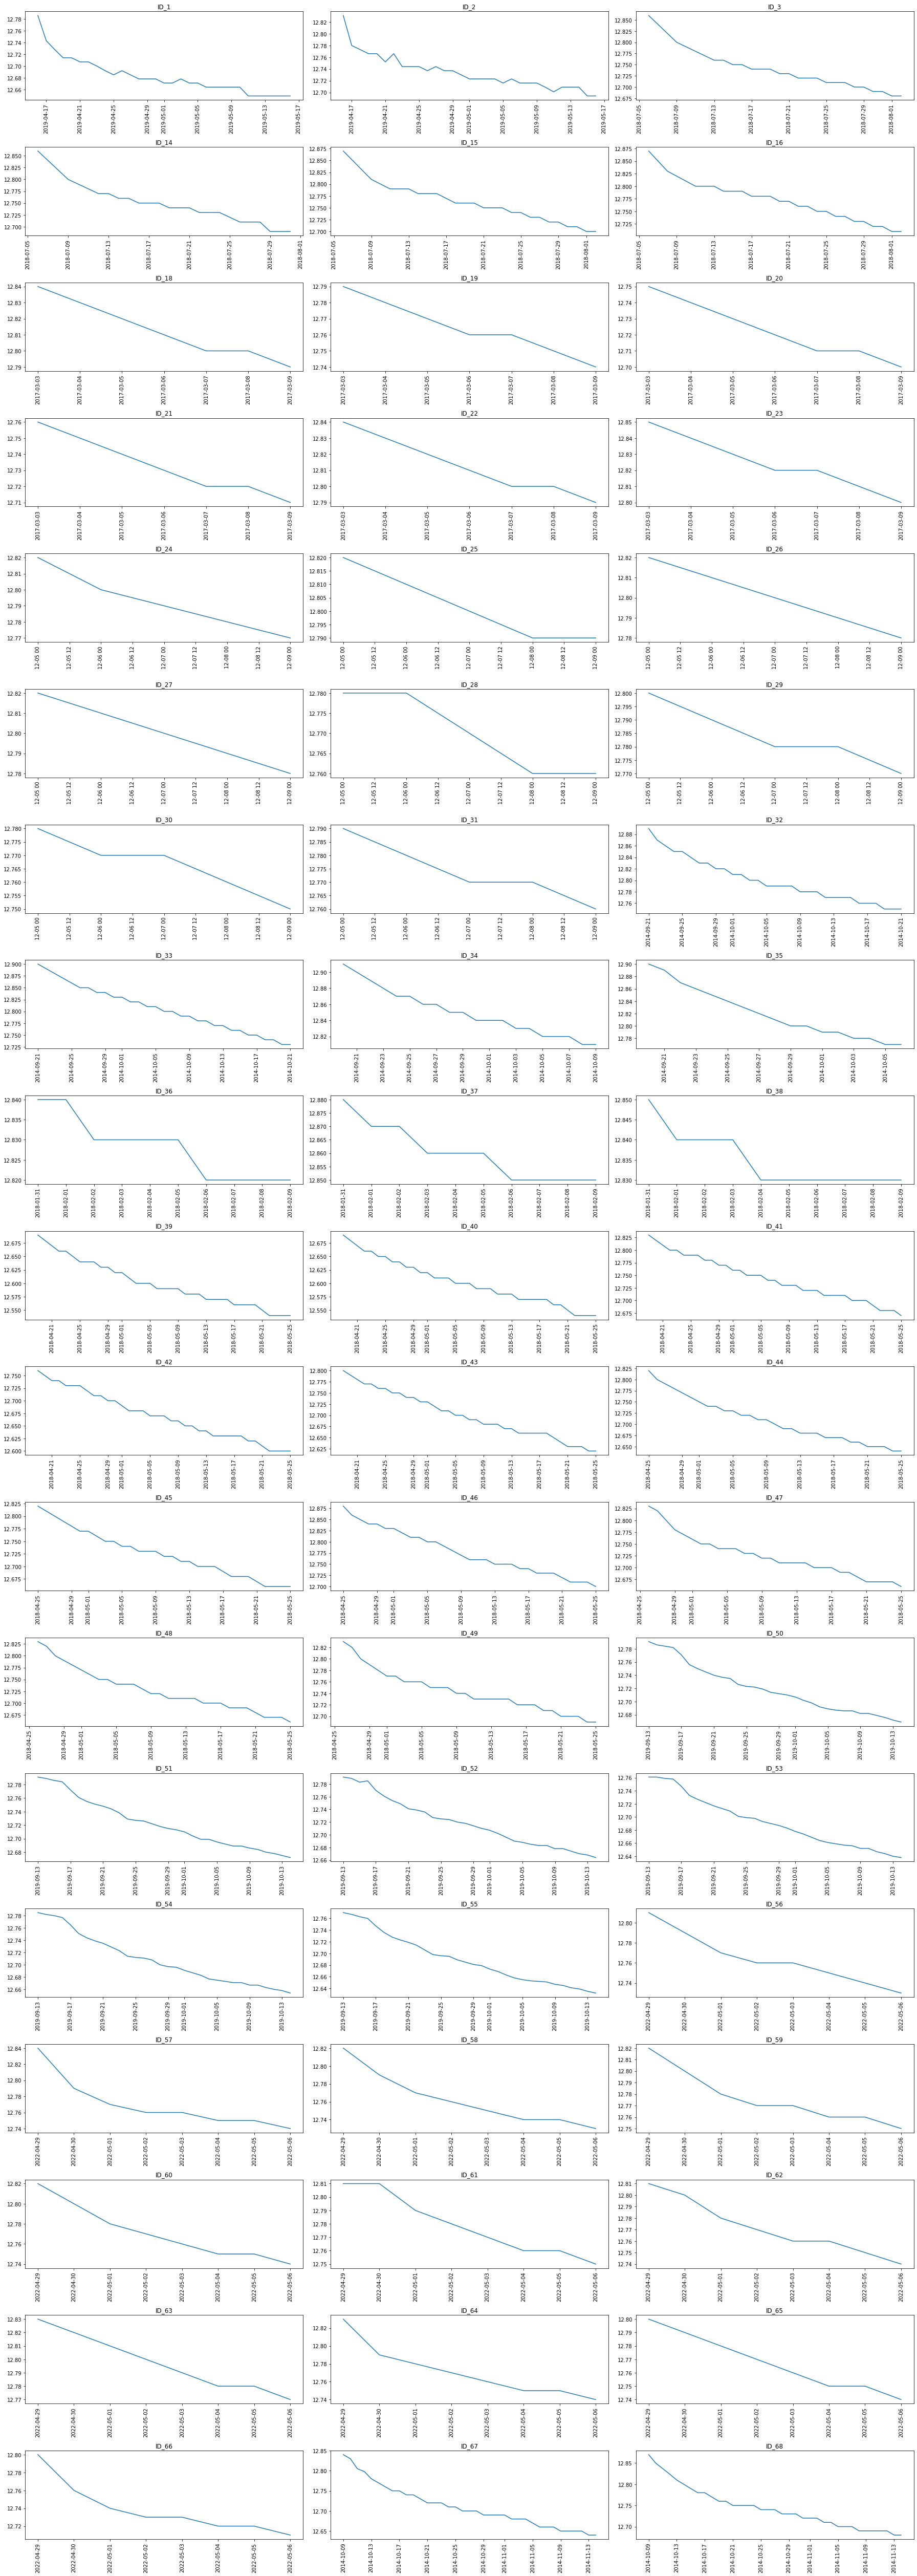

In [11]:
#Gera gráficos para cada ID
figure, axis = plt.subplots(19, 3,figsize=(25,70))
axis[0,0].plot(ID_1["Data_Medicao"],ID_1["Tensao"])
axis[0,0].set_title("ID_1")
axis[0,1].plot(ID_2["Data_Medicao"],ID_2["Tensao"])
axis[0,1].set_title("ID_2")
axis[0,2].plot(ID_3["Data_Medicao"],ID_3["Tensao"])
axis[0,2].set_title("ID_3")
axis[1,0].plot(ID_14["Data_Medicao"],ID_14["Tensao"])
axis[1,0].set_title("ID_14")
axis[1,1].plot(ID_15["Data_Medicao"],ID_15["Tensao"])
axis[1,1].set_title("ID_15")
axis[1,2].plot(ID_16["Data_Medicao"],ID_16["Tensao"])
axis[1,2].set_title("ID_16")
axis[2,0].plot(ID_18["Data_Medicao"],ID_18["Tensao"])
axis[2,0].set_title("ID_18")
axis[2,1].plot(ID_19["Data_Medicao"],ID_19["Tensao"])
axis[2,1].set_title("ID_19")
axis[2,2].plot(ID_20["Data_Medicao"],ID_20["Tensao"])
axis[2,2].set_title("ID_20")
axis[3,0].plot(ID_21["Data_Medicao"],ID_21["Tensao"])
axis[3,0].set_title("ID_21")
axis[3,1].plot(ID_22["Data_Medicao"],ID_22["Tensao"])
axis[3,1].set_title("ID_22")
axis[3,2].plot(ID_23["Data_Medicao"],ID_23["Tensao"])
axis[3,2].set_title("ID_23")
axis[4,0].plot(ID_24["Data_Medicao"],ID_24["Tensao"])
axis[4,0].set_title("ID_24")
axis[4,1].plot(ID_25["Data_Medicao"],ID_25["Tensao"])
axis[4,1].set_title("ID_25")
axis[4,2].plot(ID_26["Data_Medicao"],ID_26["Tensao"])
axis[4,2].set_title("ID_26")
axis[5,0].plot(ID_27["Data_Medicao"],ID_27["Tensao"])
axis[5,0].set_title("ID_27")
axis[5,1].plot(ID_28["Data_Medicao"],ID_28["Tensao"])
axis[5,1].set_title("ID_28")
axis[5,2].plot(ID_29["Data_Medicao"],ID_29["Tensao"])
axis[5,2].set_title("ID_29")
axis[6,0].plot(ID_30["Data_Medicao"],ID_30["Tensao"])
axis[6,0].set_title("ID_30")
axis[6,1].plot(ID_31["Data_Medicao"],ID_31["Tensao"])
axis[6,1].set_title("ID_31")
axis[6,2].plot(ID_32["Data_Medicao"],ID_32["Tensao"])
axis[6,2].set_title("ID_32")
axis[7,0].plot(ID_33["Data_Medicao"],ID_33["Tensao"])
axis[7,0].set_title("ID_33")
axis[7,1].plot(ID_34["Data_Medicao"],ID_34["Tensao"])
axis[7,1].set_title("ID_34")
axis[7,2].plot(ID_35["Data_Medicao"],ID_35["Tensao"])
axis[7,2].set_title("ID_35")
axis[8,0].plot(ID_36["Data_Medicao"],ID_36["Tensao"])
axis[8,0].set_title("ID_36")
axis[8,1].plot(ID_37["Data_Medicao"],ID_37["Tensao"])
axis[8,1].set_title("ID_37")
axis[8,2].plot(ID_38["Data_Medicao"],ID_38["Tensao"])
axis[8,2].set_title("ID_38")
axis[9,0].plot(ID_39["Data_Medicao"],ID_39["Tensao"])
axis[9,0].set_title("ID_39")
axis[9,1].plot(ID_40["Data_Medicao"],ID_40["Tensao"])
axis[9,1].set_title("ID_40")
axis[9,2].plot(ID_41["Data_Medicao"],ID_41["Tensao"])
axis[9,2].set_title("ID_41")
axis[10,0].plot(ID_42["Data_Medicao"],ID_42["Tensao"])
axis[10,0].set_title("ID_42")
axis[10,1].plot(ID_43["Data_Medicao"],ID_43["Tensao"])
axis[10,1].set_title("ID_43")
axis[10,2].plot(ID_44["Data_Medicao"],ID_44["Tensao"])
axis[10,2].set_title("ID_44")
axis[11,0].plot(ID_45["Data_Medicao"],ID_45["Tensao"])
axis[11,0].set_title("ID_45")
axis[11,1].plot(ID_46["Data_Medicao"],ID_46["Tensao"])
axis[11,1].set_title("ID_46")
axis[11,2].plot(ID_47["Data_Medicao"],ID_47["Tensao"])
axis[11,2].set_title("ID_47")
axis[12,0].plot(ID_48["Data_Medicao"],ID_48["Tensao"])
axis[12,0].set_title("ID_48")
axis[12,1].plot(ID_49["Data_Medicao"],ID_49["Tensao"])
axis[12,1].set_title("ID_49")
axis[12,2].plot(ID_50["Data_Medicao"],ID_50["Tensao"])
axis[12,2].set_title("ID_50")
axis[13,0].plot(ID_51["Data_Medicao"],ID_51["Tensao"])
axis[13,0].set_title("ID_51")
axis[13,1].plot(ID_52["Data_Medicao"],ID_52["Tensao"])
axis[13,1].set_title("ID_52")
axis[13,2].plot(ID_53["Data_Medicao"],ID_53["Tensao"])
axis[13,2].set_title("ID_53")
axis[14,0].plot(ID_54["Data_Medicao"],ID_54["Tensao"])
axis[14,0].set_title("ID_54")
axis[14,1].plot(ID_55["Data_Medicao"],ID_55["Tensao"])
axis[14,1].set_title("ID_55")
axis[14,2].plot(ID_56["Data_Medicao"],ID_56["Tensao"])
axis[14,2].set_title("ID_56")
axis[15,0].plot(ID_57["Data_Medicao"],ID_57["Tensao"])
axis[15,0].set_title("ID_57")
axis[15,1].plot(ID_58["Data_Medicao"],ID_58["Tensao"])
axis[15,1].set_title("ID_58")
axis[15,2].plot(ID_59["Data_Medicao"],ID_59["Tensao"])
axis[15,2].set_title("ID_59")
axis[16,0].plot(ID_60["Data_Medicao"],ID_60["Tensao"])
axis[16,0].set_title("ID_60")
axis[16,1].plot(ID_61["Data_Medicao"],ID_61["Tensao"])
axis[16,1].set_title("ID_61")
axis[16,2].plot(ID_62["Data_Medicao"],ID_62["Tensao"])
axis[16,2].set_title("ID_62")
axis[17,0].plot(ID_63["Data_Medicao"],ID_63["Tensao"])
axis[17,0].set_title("ID_63")
axis[17,1].plot(ID_64["Data_Medicao"],ID_64["Tensao"])
axis[17,1].set_title("ID_64")
axis[17,2].plot(ID_65["Data_Medicao"],ID_65["Tensao"])
axis[17,2].set_title("ID_65")
axis[18,0].plot(ID_66["Data_Medicao"],ID_66["Tensao"])
axis[18,0].set_title("ID_66")
axis[18,1].plot(ID_67["Data_Medicao"],ID_67["Tensao"])
axis[18,1].set_title("ID_67")
axis[18,2].plot(ID_68["Data_Medicao"],ID_68["Tensao"])
axis[18,2].set_title("ID_68")
for x in range(0,19):
  for y in range(0,3):
    axis[x,y].tick_params(axis='x', labelrotation=90)
figure.tight_layout()
plt.show()

<a name="6"></a>
### 6. Análise Gráfica Séries Medições de Tensão para ID 32

- Foi selecionado para análise os dados a série de medição com ID=32 devido apresenta volume maior de observações em relação as demais.

#### `Seleciona a bateria MODELO_D com serie de medições de tensão ID 32:`

In [12]:
MODELO_D = df[df['Modelo'] == 'MODELO_D']
MODELO_D_ID_32 = MODELO_D[MODELO_D['Id'] == 32]

#### `Visualização gráfica da série de medição ID 32:`

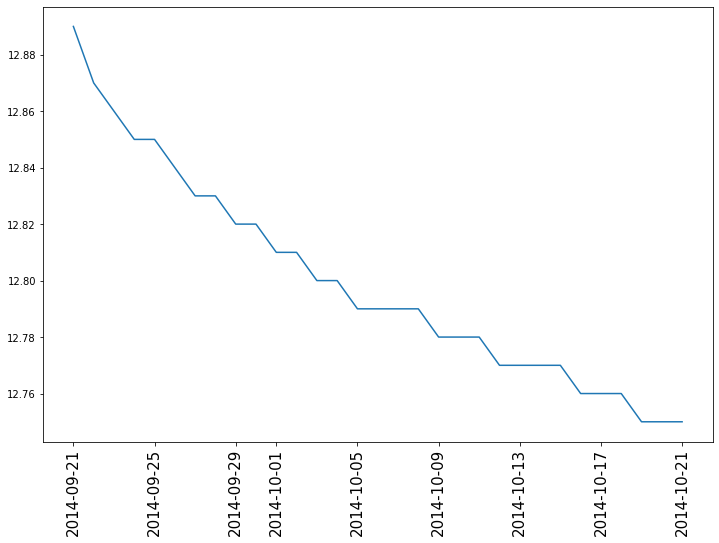

In [13]:
fig = plt.figure(figsize=(12,8))
plt.plot(MODELO_D_ID_32['Data_Medicao'],MODELO_D_ID_32['Tensao'])
plt.tick_params(axis='x',labelsize=15,rotation=90)
plt.show()

<a name="7"></a>
### 7. Tipo de Série Temporal

 - Verificar se a série é estacionária conforme teste Dickey-Fullet 

#### `Seleciona tensões da seria de medições ID 32:`

In [14]:
series = MODELO_D_ID_32['Tensao'].values
series

array([12.89, 12.87, 12.86, 12.85, 12.85, 12.84, 12.83, 12.83, 12.82,
       12.82, 12.81, 12.81, 12.8 , 12.8 , 12.79, 12.79, 12.79, 12.79,
       12.78, 12.78, 12.78, 12.77, 12.77, 12.77, 12.77, 12.76, 12.76,
       12.76, 12.75, 12.75, 12.75])

#### `Aplicando o teste Dickey-Fullet:`

In [15]:
result_stat = adfuller(series, autolag='AIC')

In [16]:
print('p-value: %f' % result_stat[1])

if result_stat[0] < result_stat[4]["5%"]:
    print ("Série temporal é estacionária")
else:
    print ("Série temporal não é estacionária")

p-value: 0.146244
Série temporal não é estacionária


<a name="8"></a>
### 8. Análises com Modelo SARIMAX



#### `Formatação dos campos Tensão e Data_Medição para utilização no modelo:`



In [17]:
MODELO_D_ID_32_index = MODELO_D_ID_32[["Tensao",'Data_Medicao']]
MODELO_D_ID_32_index = MODELO_D_ID_32_index.set_index('Data_Medicao')
MODELO_D_ID_32_index.index.names = [None]

#### `Gera parâmetros para otimização dos modelos:`



In [18]:
# define os parametros p,d e q
p = d = q = range(0, 3)

In [19]:
# gera todas as combinações para p,d e q
pdq = list(itertools.product(p, d, q))

#### `Modelo SARIMAX para parâmetro enforce_stationary=True:`



In [20]:
for param in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(MODELO_D_ID_32_index,
                                        order=param,
                                        enforce_stationarity=True)

        results = mod.fit()
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
        
    except:
        continue

ARIMA(0, 0, 0) - AIC:248.03849263187178
ARIMA(0, 0, 1) - AIC:211.51498251474726
ARIMA(0, 0, 2) - AIC:177.38156807951884
ARIMA(0, 1, 0) - AIC:-208.03215511320496
ARIMA(0, 1, 1) - AIC:-207.24674680649937
ARIMA(0, 1, 2) - AIC:-207.36745496415426
ARIMA(0, 2, 0) - AIC:-193.57682791457606
ARIMA(0, 2, 1) - AIC:-212.1149340543837
ARIMA(0, 2, 2) - AIC:-212.0024753899281
ARIMA(1, 0, 0) - AIC:-198.09221524598578
ARIMA(1, 0, 1) - AIC:-139.19068132387773
ARIMA(1, 0, 2) - AIC:-185.3302215317296
ARIMA(1, 1, 0) - AIC:-208.4080005701337
ARIMA(1, 1, 1) - AIC:-215.85172632404345
ARIMA(1, 1, 2) - AIC:-220.06112014867372
ARIMA(1, 2, 0) - AIC:-208.03082429255852
ARIMA(1, 2, 1) - AIC:-212.70796380314113
ARIMA(1, 2, 2) - AIC:-213.88917430441649
ARIMA(2, 0, 0) - AIC:-165.18712199494882
ARIMA(2, 0, 1) - AIC:-193.96614798656714
ARIMA(2, 1, 0) - AIC:-214.45627684508057
ARIMA(2, 1, 1) - AIC:-218.6335424927135
ARIMA(2, 1, 2) - AIC:-212.98501544360354
ARIMA(2, 2, 0) - AIC:-210.34835919810754
ARIMA(2, 2, 1) - AIC:-21

In [21]:
mod = sm.tsa.statespace.SARIMAX(MODELO_D_ID_32_index,
                                order=(1, 1, 2),                               
                                enforce_stationarity=True)
                               

results = mod.fit()

In [22]:
pred = results.get_prediction(start=pd.to_datetime('2014-10-13'), dynamic=False)

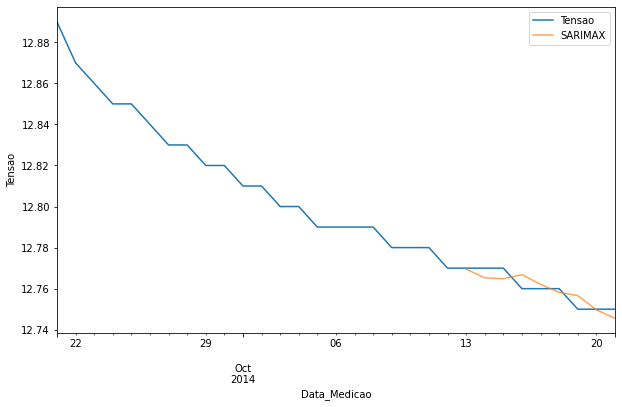

In [23]:
plt.rcParams["figure.figsize"] = (10,6)
ax = MODELO_D_ID_32_index['2014-09-21':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='SARIMAX', alpha=.7)

ax.set_xlabel('Data_Medicao')
ax.set_ylabel('Tensao')
plt.legend()

plt.show()

#### `Modelo SARIMAX para parâmetro enforce_stationary=False`


In [24]:
for param in pdq:
    try:
        mod_1 = sm.tsa.statespace.SARIMAX(MODELO_D_ID_32_index,
                                        order=param,
                                        enforce_stationarity=False)
                                        

        results_1 = mod_1.fit()

        print('ARIMA{} - AIC:{}'.format(param, results_1.aic))
    except:
        continue

ARIMA(0, 0, 0) - AIC:240.08760936311916
ARIMA(0, 0, 1) - AIC:198.32103902857727
ARIMA(0, 0, 2) - AIC:161.53540781002346
ARIMA(0, 1, 0) - AIC:-208.39069763189798
ARIMA(0, 1, 1) - AIC:-201.07560588451176
ARIMA(0, 1, 2) - AIC:-201.70716281452758
ARIMA(0, 2, 0) - AIC:-187.2863939732214
ARIMA(0, 2, 1) - AIC:-198.29624504438777
ARIMA(0, 2, 2) - AIC:-210.46936377351724
ARIMA(1, 0, 0) - AIC:-221.85538553421938
ARIMA(1, 0, 1) - AIC:-224.46018696815347
ARIMA(1, 0, 2) - AIC:-219.07164873574985
ARIMA(1, 1, 0) - AIC:-208.91405269006208
ARIMA(1, 1, 1) - AIC:-211.591194506977
ARIMA(1, 1, 2) - AIC:-216.81660350238363
ARIMA(1, 2, 0) - AIC:-201.75915710031236
ARIMA(1, 2, 1) - AIC:-204.19472628910557
ARIMA(1, 2, 2) - AIC:-205.38444466016884
ARIMA(2, 0, 0) - AIC:-221.4341843554882
ARIMA(2, 0, 1) - AIC:-212.85956702635627
ARIMA(2, 0, 2) - AIC:-164.44265678691644
ARIMA(2, 1, 0) - AIC:-207.74600059412322
ARIMA(2, 1, 1) - AIC:-218.0950605757579
ARIMA(2, 1, 2) - AIC:-214.77939228796785
ARIMA(2, 2, 0) - AIC:-19

In [25]:
mod_1 = sm.tsa.statespace.SARIMAX(MODELO_D_ID_32_index,
                                order=(1, 0, 1),                               
                                enforce_stationarity=False)
                                

results_1 = mod_1.fit()

In [26]:
pred_1 = results_1.get_prediction(start=pd.to_datetime('2014-10-13'), dynamic=False)

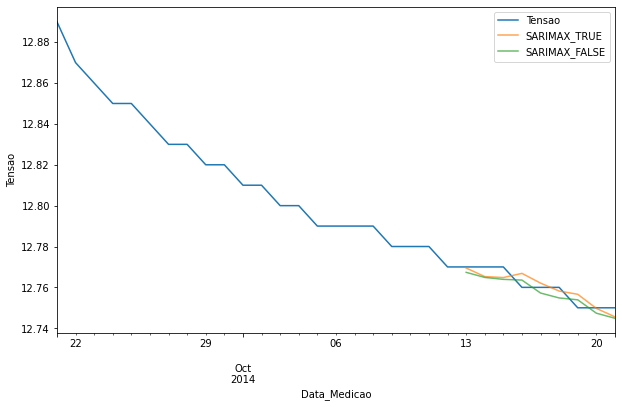

In [27]:
plt.rcParams["figure.figsize"] = (10,6)
ax = MODELO_D_ID_32_index['2014-09-21':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='SARIMAX_TRUE', alpha=.7)
pred_1.predicted_mean.plot(ax=ax, label='SARIMAX_FALSE', alpha=.7)

ax.set_xlabel('Data_Medicao')
ax.set_ylabel('Tensao')
plt.legend()

plt.show()

<a name="9"></a>
### 9. Avaliação dos Modelos

- Para avaliação dos modelos será utilizado como métrica MSE

In [28]:
print('SARIMAX_Stationary_TRUE model MSE:{}'.format(mean_squared_error(MODELO_D_ID_32_index['2014-10-13':],pred.predicted_mean)))
print('SARIMAX_Stationary_FALSE model MSE:{}'.format(mean_squared_error(MODELO_D_ID_32_index['2014-10-13':],pred_1.predicted_mean)))

SARIMAX_Stationary_TRUE model MSE:1.8597012166189576e-05
SARIMAX_Stationary_FALSE model MSE:1.8436807907221975e-05


- Com base nas análises realizadas, verificamos a possibilidade de utilizar o modelo SARIMAX para realizar a previsão da auto descarga de uma bateria chumbo-ácido ao longo do tempo. Foi verificado graficamente e através da métrica MSE, que o parâmetro ENFORCE_STATIONARY do modelo SARIMAX não interfere de forma significativa no modelo de previsão gerado.
Desta forma, o modelo pode ser utilizado para realizar uma previsão de quando uma bateria irá atingir uma tensão limite onde será necessário realizar alguma intervenção para não comprometer a qualidade da bateria.
Como continuidade das análises e trabalhos futuros poderão ser utilizados outros modelos de previsão para séries temporais e coletados mais dados de um único tipo de bateria, para gerar um modelo com uma melhor precisão na previsão da auro descarga de uma bateria.
